# Plotting with Folium

__What is Folium?__

[Folium](https://python-visualization.github.io/folium/) builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the leaflet.js library. This allows you to manipulate your data in Geopandas and visualize it on a Leaflet map via Folium.

In this example, we will first use Geopandas to load the geometries (volcano point data), and then create the Folium map with markers representing the different types of volcanoes.

## Load geometries
This example uses a freely available [volcano dataset](https://www.kaggle.com/texasdave/volcano-eruptions). We will be reading the csv file using pandas, and then convert the pandas `DataFrame` to a Geopandas `GeoDataFrame`.

In [1]:
# Import Libraries
import pandas as pd
import geopandas
import folium
import geodatasets
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("volcano_data_2010.csv")

# Keep only relevant columns
# note that brackets allow you to filter subsets of rows and select subsets of columns with rows first : [rows : columns]
# take a look at volcano_data_2010.csv to see the full set of columns in the original data
df = df1.loc[:, ("Year", "Name", "Country", "Latitude", "Longitude", "Type")]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       63 non-null     int64  
 1   Name       63 non-null     object 
 2   Country    63 non-null     object 
 3   Latitude   63 non-null     float64
 4   Longitude  63 non-null     float64
 5   Type       63 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.1+ KB


In [3]:
# Create point geometries
geometry = geopandas.points_from_xy(df.Longitude, df.Latitude)
geo_df = geopandas.GeoDataFrame(
    df, geometry=geometry
)

geo_df.head()

,Year,Name,Country,Latitude,Longitude,Type,geometry
0,2010,Tungurahua,Ecuador,-1.467,-78.442,Stratovolcano,POINT (-78.44200 -1.46700)
1,2010,Eyjafjallajokull,Iceland,63.630,-19.620,Stratovolcano,POINT (-19.62000 63.63000)
2,2010,Pacaya,Guatemala,14.381,-90.601,Complex volcano,POINT (-90.60100 14.38100)
3,2010,Sarigan,United States,16.708,145.780,Stratovolcano,POINT (145.78000 16.70800)
4,2010,Karangetang [Api Siau],Indonesia,2.780,125.480,Stratovolcano,POINT (125.48000 2.78000)


In [4]:
world = geopandas.read_file(geodatasets.get_path("naturalearth.land"))
df.Type.unique()

array(['Stratovolcano', 'Complex volcano', 'Shield volcano',
       'Subglacial volcano', 'Lava dome', 'Caldera'], dtype=object)

Text(0.5, 1.0, 'Volcanoes')

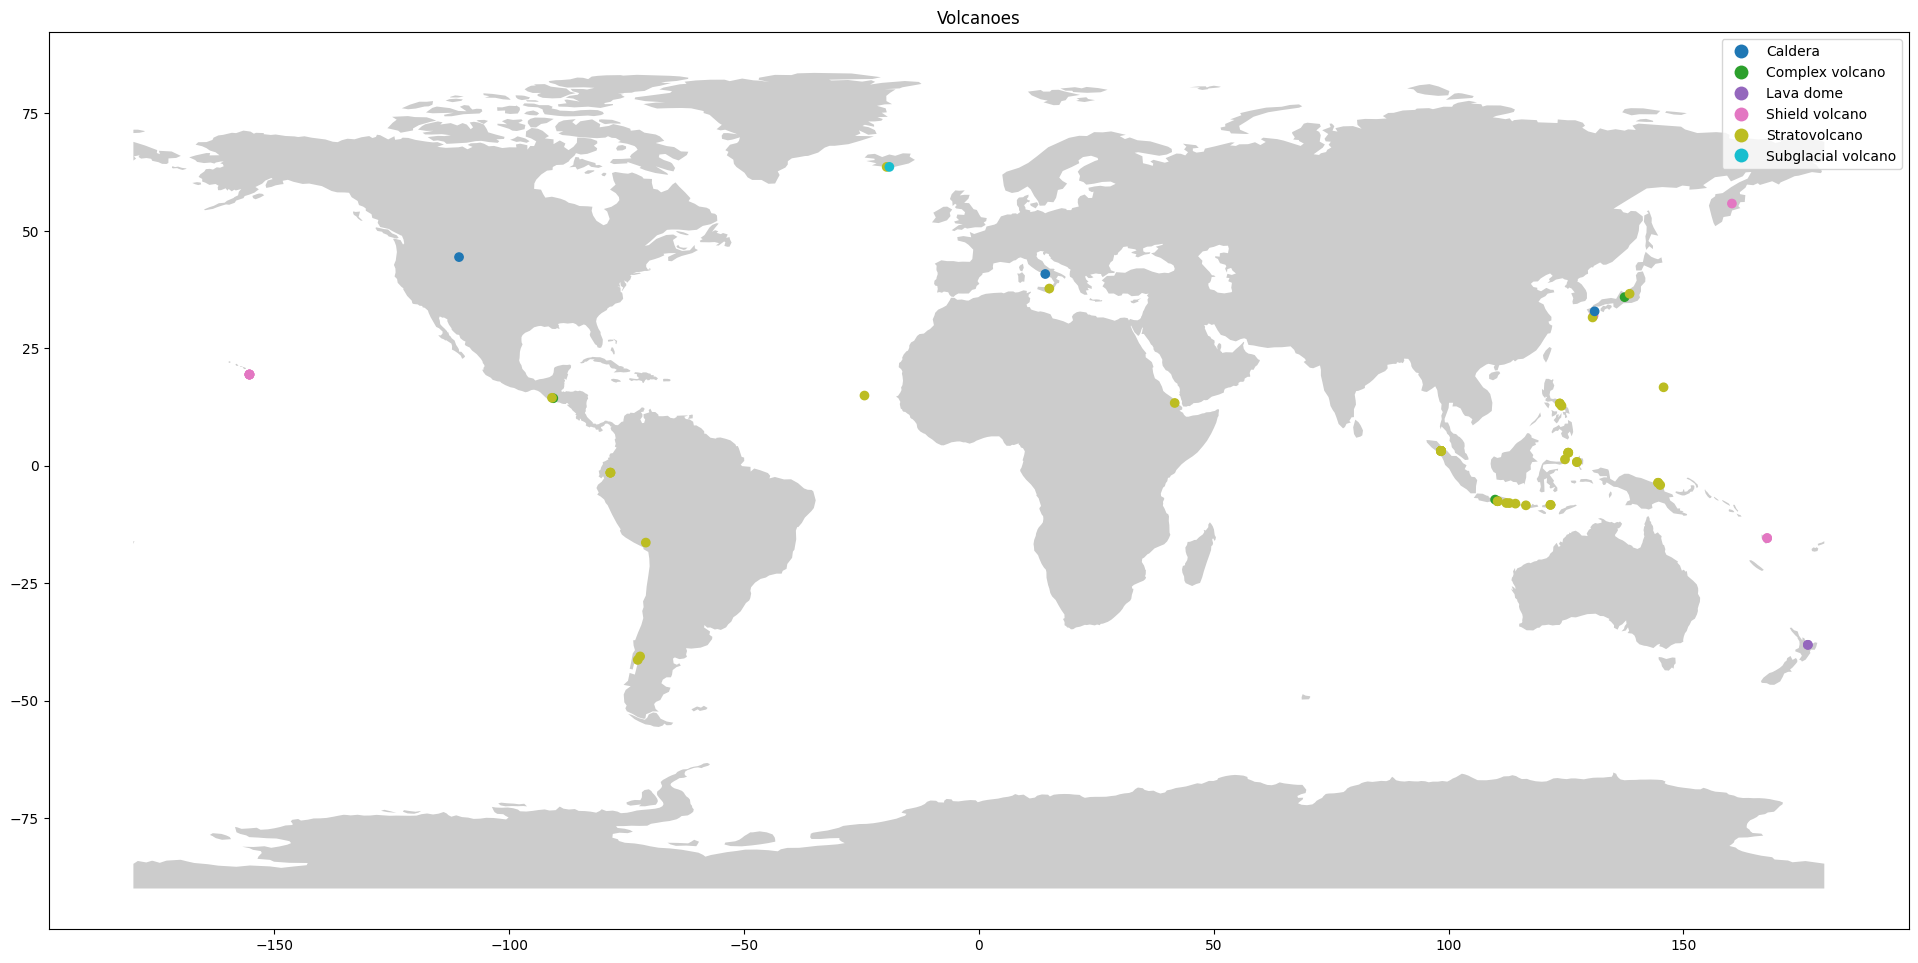

In [5]:
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(column="Type", ax=ax, legend=True)
plt.title("Volcanoes")

## Create Folium map
Folium has a number of built-in tilesets from OpenStreetMap, Mapbox, and CartoDB. For example:

In [6]:
# CartoDB Positron
map = folium.Map(location=[13.406, 80.110], tiles="CartoDB Positron", zoom_start=9)
map

In [7]:
# OpenStreetMap
map = folium.Map(location=[13.406, 80.110], tiles="OpenStreetMap", zoom_start=9)
map

### Add markers
To represent the different types of volcanoes, you can create Folium markers and add them to your map.

In [8]:
# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each volcano, color-coded by its type.
i = 0
for coordinates in geo_df_list:
    # assign a color marker for the type of volcano, Strato being the most common
    if geo_df.Type[i] == "Stratovolcano":
        type_color = "green"
    elif geo_df.Type[i] == "Complex volcano":
        type_color = "blue"
    elif geo_df.Type[i] == "Shield volcano":
        type_color = "orange"
    elif geo_df.Type[i] == "Lava dome":
        type_color = "pink"
    else:
        type_color = "purple"

    # Place the markers with the popup labels and data
    map.add_child(
        folium.Marker(
            location=coordinates,
            popup="Year: "
            + str(geo_df.Year[i])
            + "<br>"
            + "Name: "
            + str(geo_df.Name[i])
            + "<br>"
            + "Country: "
            + str(geo_df.Country[i])
            + "<br>"
            + "Type: "
            + str(geo_df.Type[i])
            + "<br>"
            + "Coordinates: "
            + str(geo_df_list[i]),
            icon=folium.Icon(color="%s" % type_color),
        )
    )
    i = i + 1

In [9]:
map

## Folium Heatmaps

Folium is well known for its heatmaps, which create a heatmap layer. To plot a heatmap in Folium, you need a list of latitudes and longitudes.

In [10]:
# This example uses heatmaps to visualize the density of volcanoes
# which is more in some parts of the world compared to others.

from folium import plugins

map = folium.Map(location=[15, 30], tiles="Cartodb dark_matter", zoom_start=2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map